2. Feature Engineering I (10%)

In [1]:
import pandas as pd
import numpy as np
import math
import requests
import json
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\chait\OneDrive\Documents\School\IFT_6758\2.Project\Milestone2_Draft\data_phase2\tidy_df.csv')
# Imputing empty net data in existing dataframe

df['empty_net'] = df['empty_net'].replace(np.nan,0)
df['empty_net'] = df['empty_net'].replace(True,1)
df['empty_net'] = df['empty_net'].replace(False,0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408783 entries, 0 to 408782
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   game_id                    408783 non-null  int64  
 1   season                     408783 non-null  int64  
 2   season_type                408783 non-null  object 
 3   event_id                   408783 non-null  int64  
 4   home_team                  408783 non-null  object 
 5   away_team                  408783 non-null  object 
 6   home_team_side_1st_period  399561 non-null  object 
 7   attacking_team             408783 non-null  object 
 8   attacking_player           408783 non-null  object 
 9   goalie                     406884 non-null  object 
 10  period                     408783 non-null  int64  
 11  period_time                408783 non-null  object 
 12  goal_ind                   408783 non-null  int64  
 13  shot_ind                   40

“shot angle” measure is the angle at which the goal, shot, or miss came from; this can range from -90 to 90. Imagine you are standing where the goalie does on the ice. Straight ahead of you would be 0 degrees, perfectly right would be 90, and perfectly left would be -90

Ref: https://thecommutesports.com/2019/10/01/nhl-goalie-analysis/

In [3]:
# Angle of the shot added to the dataframe
# df['angle_from_net'] = np.arcsin(df['y_coordinates'].abs()/df['distance_from_net'])*180/math.pi

list_angle = []
for i in range(0,df.shape[0]):

    if df.attacking_team_side[i] == "right":
        if df.y_coordinates[i] == 0:
            list_angle.append(0)
        elif df.y_coordinates[i] > 0:
            list_angle.append(np.arcsin(df.y_coordinates[i]/df.distance_from_net[i])*-180/math.pi)
        else:
            list_angle.append(np.arcsin(df.y_coordinates[i]/df.distance_from_net[i])*-180/math.pi)
            
    elif df.attacking_team_side[i] == "left":
        if df.y_coordinates[i] == 0:
            list_angle.append(0)
        elif df.y_coordinates[i] > 0:
            list_angle.append(np.arcsin(df.y_coordinates[i]/df.distance_from_net[i])*180/math.pi)
        else:
            list_angle.append(np.arcsin(df.y_coordinates[i]/df.distance_from_net[i])*180/math.pi)
df['angle_from_net'] = list_angle


In [4]:
df.head()

,game_id,season,season_type,event_id,home_team,away_team,home_team_side_1st_period,attacking_team,attacking_player,goalie,...,shot_ind,x_coordinates,y_coordinates,shot_type,empty_net,strength,gwg,distance_from_net,attacking_team_side,angle_from_net
0,2015020001,20152016,R,7,Toronto Maple Leafs,Montréal Canadiens,right,Toronto Maple Leafs,Brad Boyes,Carey Price,...,1,-55.0,6.0,Wrist Shot,0,NaN,NaN,34.525353,right,-10.007980
1,2015020001,20152016,R,9,Toronto Maple Leafs,Montréal Canadiens,right,Toronto Maple Leafs,Nazem Kadri,Carey Price,...,1,-79.0,0.0,Snap Shot,0,NaN,NaN,10.000000,right,0.000000
2,2015020001,20152016,R,10,Toronto Maple Leafs,Montréal Canadiens,right,Toronto Maple Leafs,Nazem Kadri,Carey Price,...,1,-75.0,-1.0,Snap Shot,0,NaN,NaN,14.035669,right,4.085617
3,2015020001,20152016,R,13,Toronto Maple Leafs,Montréal Canadiens,right,Toronto Maple Leafs,Daniel Winnik,Carey Price,...,1,-55.0,-36.0,Wrist Shot,0,NaN,NaN,49.517674,right,46.636577
4,2015020001,20152016,R,21,Toronto Maple Leafs,Montréal Canadiens,right,Toronto Maple Leafs,Joffrey Lupul,Carey Price,...,1,-61.0,-1.0,Tip-In,0,NaN,NaN,28.017851,right,2.045408


In [5]:
df = df[~df['distance_from_net'].isnull()] # distance was null for 17 rows
df = df[~df['angle_from_net'].isnull()] # angle was null for 18 rows

In [6]:
# training (train+validation sets for model) and test tests creation

df_train = df[df['season'] != 20192020]
df_test = df[df['season'] == 20192020]
print(df_train.shape)
print(df_test.shape)

(332722, 23)
(76040, 23)


In [7]:
df_train_nogoals = df_train[df_train['shot_ind']==1]
df_train_goals = df_train[df_train['goal_ind']==1]

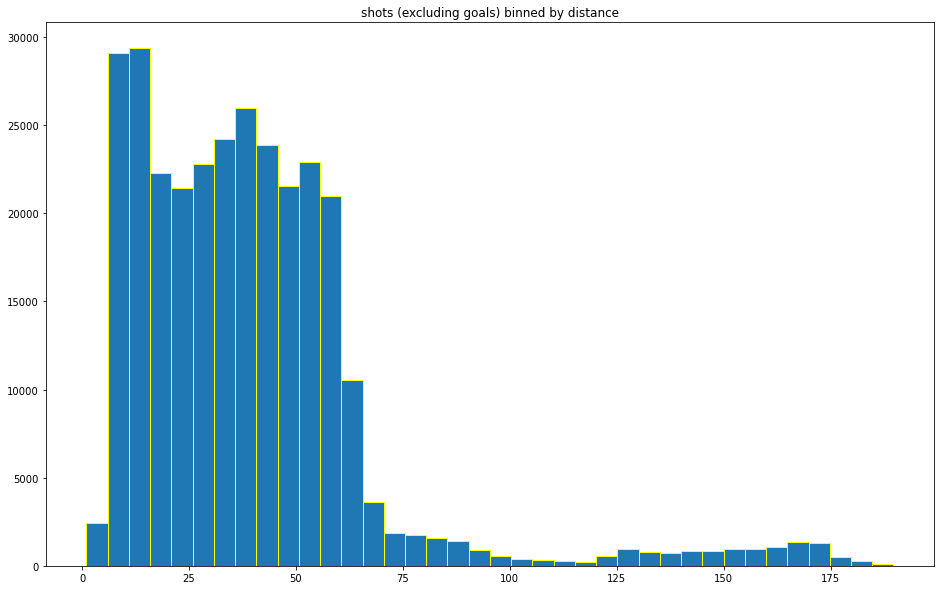

In [8]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_nogoals['distance_from_net'], edgecolor="yellow", bins=math.ceil((df_train_nogoals['distance_from_net'].max() - df_train_nogoals['distance_from_net'].min())/5))
plt.title("shots (excluding goals) binned by distance")
plt.show()



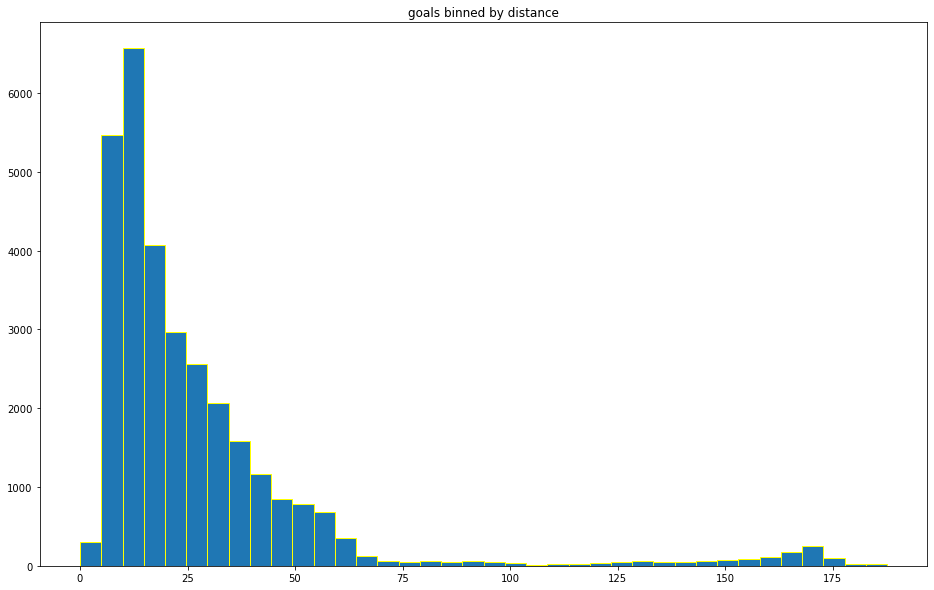

In [9]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_goals['distance_from_net'], edgecolor="yellow", bins=math.ceil((df_train_goals['distance_from_net'].max() - df_train_goals['distance_from_net'].min())/5))
plt.title("goals binned by distance")
plt.show()

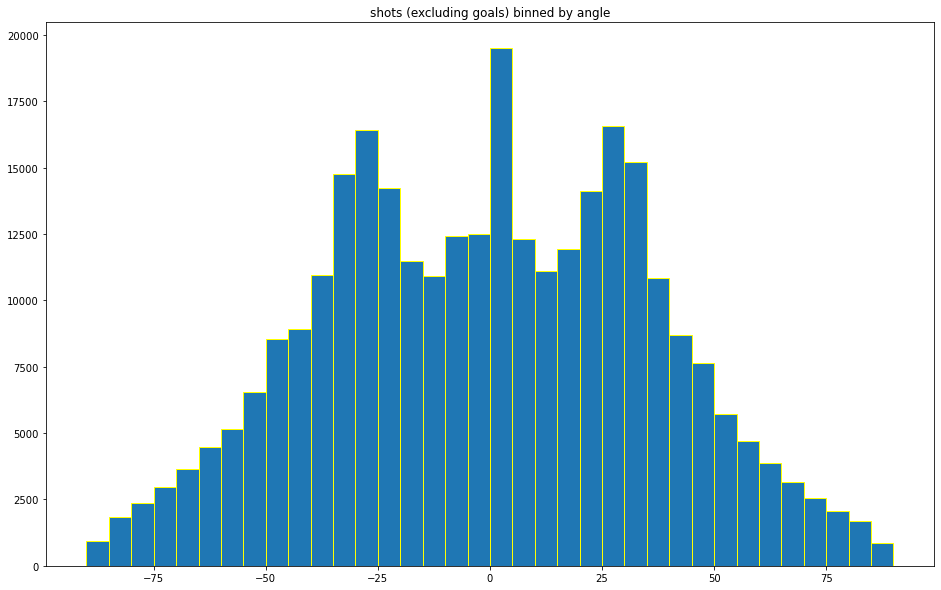

In [10]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_nogoals['angle_from_net'], edgecolor="yellow", bins=math.ceil((df_train_nogoals['angle_from_net'].max() - df_train_nogoals['angle_from_net'].min())/5))
plt.title("shots (excluding goals) binned by angle")
plt.show()


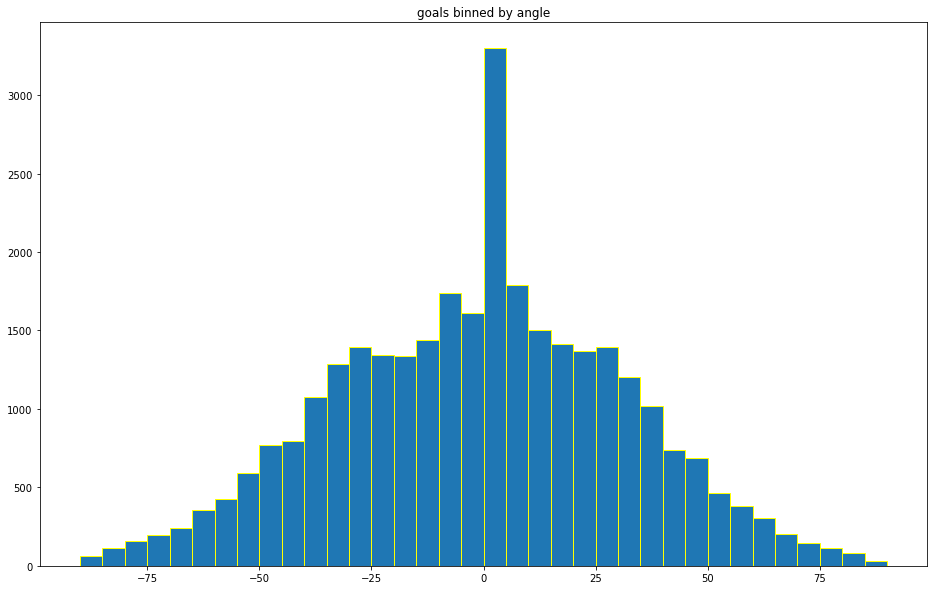

In [11]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_goals['angle_from_net'],edgecolor="yellow", bins=math.ceil((df_train_goals['angle_from_net'].max() - df_train_goals['angle_from_net'].min())/5))
plt.title("goals binned by angle")
plt.show()


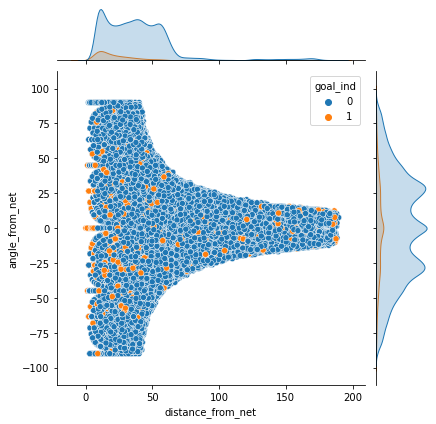

In [12]:
# Joint plot showing the relation between distance of the shot and angle of the shot
sns.jointplot(data=df_train, x="distance_from_net", y="angle_from_net", hue="goal_ind")


<ipython-input-13-d53752cc87d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['distance_from_net_bucket'] = pd.qcut(df_train['distance_from_net'], n_buckets, labels = False) +1
<ipython-input-13-d53752cc87d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['angle_from_net_bucket'] = pd.qcut(df_train['angle_from_net'], n_buckets, labels = False) +1
<ipython-input-13-d53752cc87d7>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI b

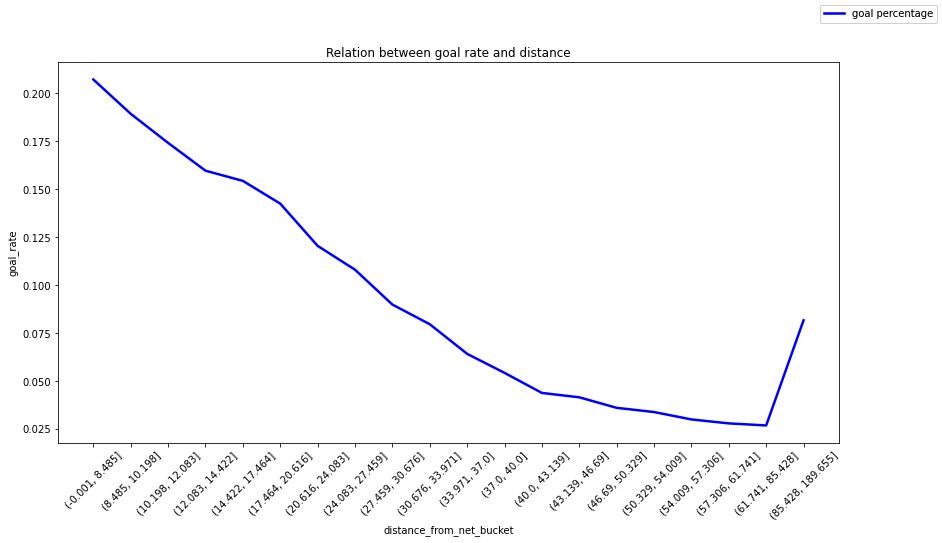

In [13]:
# Relation between goal rate and distance


n_buckets = 20

df_train['distance_from_net_bucket'] = pd.qcut(df_train['distance_from_net'], n_buckets, labels = False) +1
df_train['angle_from_net_bucket'] = pd.qcut(df_train['angle_from_net'], n_buckets, labels = False) +1

intervals = list(set(pd.qcut(df_train['distance_from_net'], n_buckets)))
intervals.sort()
intervals = [str(interval) for interval in intervals]


intervals_ang = list(set(pd.qcut(df_train['angle_from_net'], n_buckets)))
intervals_ang.sort()
intervals_ang = [str(interval_ang) for interval_ang in intervals_ang]

df_train_copy = df_train.copy()
df_train_copy['shot_count'] = 1

df_train_copy1 = df_train_copy[['goal_ind','shot_count','distance_from_net_bucket']].groupby(['distance_from_net_bucket']).sum().reset_index()
df_train_copy1['goal_rate'] = df_train_copy1['goal_ind']/df_train_copy1['shot_count']

y1_max = max(df_train_copy1['goal_rate'])

fig = plt.figure(figsize = (14,7))
ax = sns.lineplot(x = 'distance_from_net_bucket', y = 'goal_rate', label='goal percentage', data = df_train_copy1, color='b', legend = False, linewidth = 2.5)
ax.set_xticks(range(1,n_buckets+1))
ax.set_xticklabels(intervals, rotation = 45)
ax.set_ylim(bottom=0, top=y1_max * 1.1)
fig.legend(loc="upper right")
plt.title(f"Relation between goal rate and distance")
fig.legend(loc="upper right")
plt.autoscale()
fig.show()
#fig.savefig("../../ift6758-blog-template-main/figures/question_5_2_"+str(i)+".png", bbox_inches = 'tight')


<ipython-input-14-84c5a50b1062>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


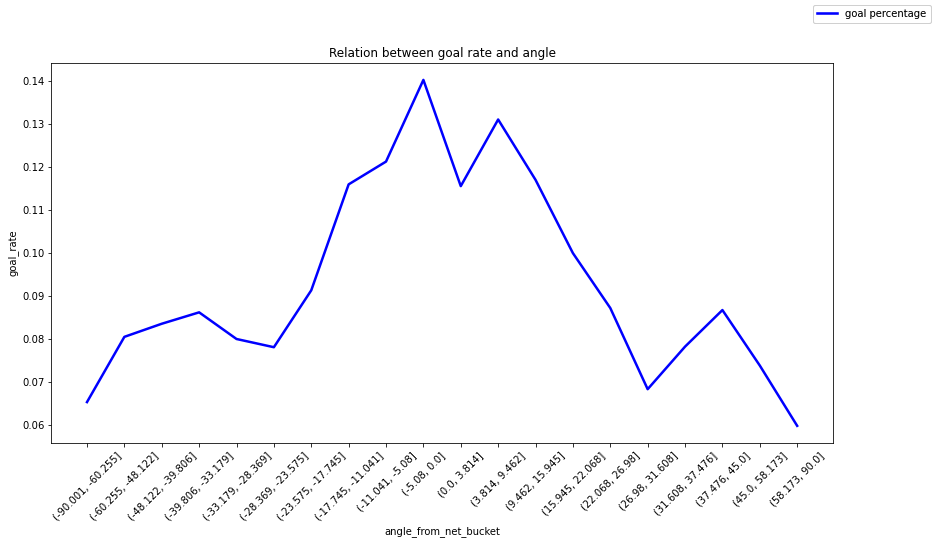

In [14]:
# Relation between goal rate and angle

df_train_copy2 = df_train_copy[['goal_ind','shot_count','angle_from_net_bucket']].groupby(['angle_from_net_bucket']).sum().reset_index()
df_train_copy2['goal_rate'] = df_train_copy2['goal_ind']/df_train_copy2['shot_count']

y2_max = max(df_train_copy2['goal_rate'])

fig = plt.figure(figsize = (14,7))
ax = sns.lineplot(x = 'angle_from_net_bucket', y = 'goal_rate', label='goal percentage', data = df_train_copy2, color='b', legend = False, linewidth = 2.5)
ax.set_xticks(range(1,n_buckets+1))
ax.set_xticklabels(intervals_ang, rotation = 45)
ax.set_ylim(bottom=0, top=y2_max * 1.1)
fig.legend(loc="upper right")
plt.title(f"Relation between goal rate and angle")
fig.legend(loc="upper right")
plt.autoscale()
fig.show()

In [15]:
#goals only to be binned by distance for empty net and non-empty net events

df_train_empty_net = df_train[(df_train['empty_net']==1) & (df_train['goal_ind']==1)]
df_train_non_empty_net = df_train[(df_train['empty_net']==0) & (df_train['goal_ind']==1)]
df_train_non_empty_net.shape

(29559, 25)

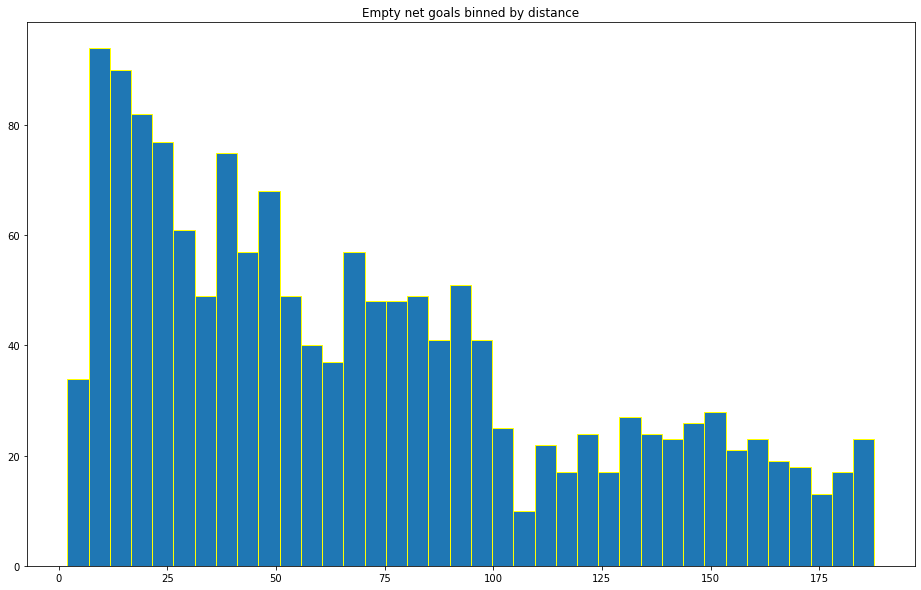

In [16]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_empty_net['distance_from_net'], edgecolor="yellow", bins=math.ceil((df_train_empty_net['distance_from_net'].max() - df_train_empty_net['distance_from_net'].min())/5))
plt.title("Empty net goals binned by distance")
plt.show()

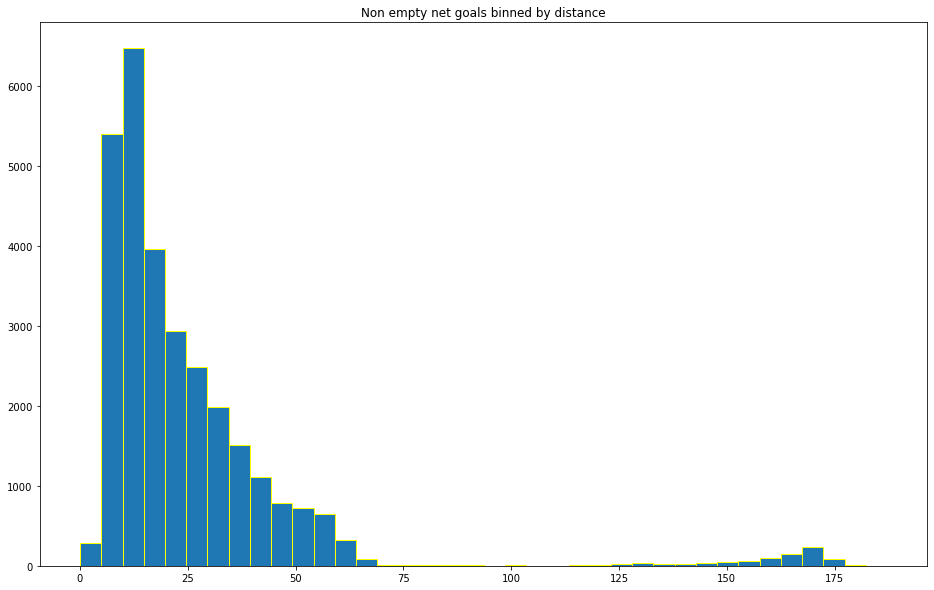

In [17]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_non_empty_net['distance_from_net'], edgecolor="yellow", bins=math.ceil((df_train_non_empty_net['distance_from_net'].max() - df_train_non_empty_net['distance_from_net'].min())/5))
plt.title("Non empty net goals binned by distance")
plt.show()

In [18]:
# events that have incorrect features (e.g. wrong x/y coordinates) validated by the NHL gamecenter video clips


df_goals = df[df['goal_ind']==1]
df_goals_anomaly = df_goals[(df_goals['x_coordinates'].abs()>89)&(df_goals['distance_from_net']>=150)&(df_goals['empty_net']==0)]
df_goals_anomaly

,game_id,season,season_type,event_id,home_team,away_team,home_team_side_1st_period,attacking_team,attacking_player,goalie,...,shot_ind,x_coordinates,y_coordinates,shot_type,empty_net,strength,gwg,distance_from_net,attacking_team_side,angle_from_net
4192,2015020071,20152016,R,139,New York Islanders,San Jose Sharks,left,New York Islanders,Anders Lee,Alex Stalock,...,0,97.0,7.0,Backhand,0,Power Play,False,186.131674,right,-2.155276
9678,2015020163,20152016,R,315,Edmonton Oilers,Calgary Flames,left,Calgary Flames,Michael Frolik,Cam Talbot,...,0,93.0,26.0,Wrist Shot,0,Even,True,183.847763,right,-8.130102
15508,2015020261,20152016,R,240,New York Islanders,Arizona Coyotes,left,New York Islanders,John Tavares,Anders Lindback,...,0,-92.0,10.0,Wrist Shot,0,Even,True,181.276033,left,3.162298
22723,2015020383,20152016,R,134,Columbus Blue Jackets,Florida Panthers,left,Florida Panthers,Vincent Trocheck,Sergei Bobrovsky,...,0,-92.0,-20.0,Deflected,0,Even,False,182.101620,left,-6.305446
110213,2016020510,20162017,R,167,Florida Panthers,Detroit Red Wings,right,Florida Panthers,Derek MacKenzie,Jared Coreau,...,0,-97.0,21.0,Slap Shot,0,Even,False,187.181730,left,6.441600
404670,2019030145,20192020,P,212,Boston Bruins,Carolina Hurricanes,left,Boston Bruins,Patrice Bergeron,Petr Mrazek,...,0,98.0,14.0,Wrist Shot,0,Power Play,True,187.523332,right,-4.281536
404871,2019030154,20192020,P,101,Chicago Blackhawks,Vegas Golden Knights,right,Chicago Blackhawks,Matthew Highmore,Robin Lehner,...,0,97.0,21.0,Snap Shot,0,Even,True,187.181730,right,-6.441600
405627,2019030176,20192020,P,32,Calgary Flames,Dallas Stars,right,Calgary Flames,Johnny Gaudreau,Anton Khudobin,...,0,94.0,24.0,Wrist Shot,0,Power Play,False,184.567061,right,-7.471559
405972,2019030185,20192020,P,115,St. Louis Blues,Vancouver Canucks,left,St. Louis Blues,Ryan O'Reilly,Jacob Markstrom,...,0,-91.0,-7.0,Backhand,0,Even,False,180.136060,left,-2.227047


# 3. Baseline Models (15%)

In [99]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay


<AxesSubplot:xlabel='goal_ind', ylabel='count'>

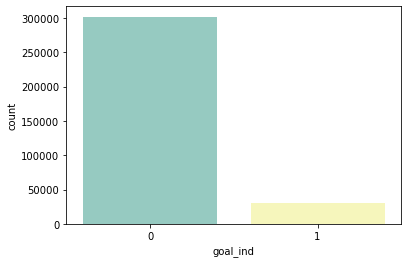

In [20]:
# Class 0 (no-goal) vs. Class 1 (goal) of the whole training set
sns.countplot(x='goal_ind', data = df_train, palette = 'Set3')

<AxesSubplot:xlabel='goal_ind', ylabel='count'>

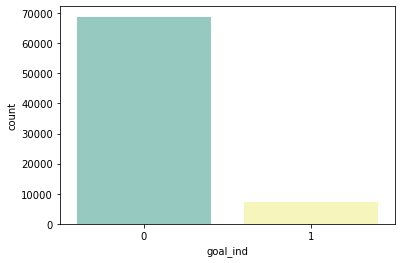

In [21]:
# Class 0 (no-goal) vs. Class 1 (goal) of the final test set

sns.countplot(x='goal_ind', data = df_test, palette = 'Set3')

<AxesSubplot:xlabel='shot_type', ylabel='count'>

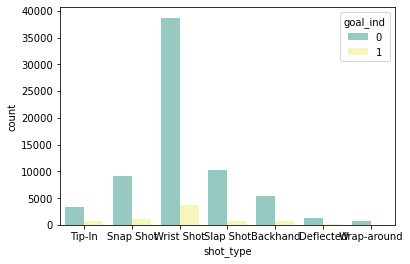

In [22]:
sns.countplot(x='shot_type', data = df_test, palette = 'Set3', hue = 'goal_ind')

In [202]:
# Functions for 4 plots

def roc_auc_plot(df_roc,df_auc):
    plt.figure(figsize=(12.5,7.5))
    lw = 3
    color_list = ['darkorange','green','navy','red']
    for i in range(4):
        
        plt.plot(df_roc.FPR[i], df_roc.TPR[i],color=color_list[i],lw=lw,label=f'{df_auc.Feature[i]} (area = {df_auc.AUC[i]})')

    plt.plot([0, 1], [0, 1], color="black", lw=lw, label="Ideal Random Baseline",linestyle="--")
    plt.legend(fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.title("ROC CURVE", fontsize=18)
    plt.savefig('ROC.png')
    plt.show()

def goal_rate_plot(df_perc_prop,n_bins):
    
    fig = plt.figure(figsize=(12.5,7.5))
    color_list = ['darkorange','green','navy','red']
    
    for i in range(4):

        ax = sns.lineplot(x = df_perc_prop.pctile[i*n_bins:n_bins*(i+1)-1], y = df_perc_prop.goal_rate[i*n_bins:n_bins*(i+1)-1], label=f'{df_auc.Feature[i]}', color=color_list[i], legend = False, linewidth = 3)

    ax.set_xlim(left=105, right=-5)
    ax.set_ylim(bottom=0, top=df_perc_prop['goal_rate'].max()+0.05)
    fig.legend(loc="upper right")
    plt.title(f"Goal Rate v.s. Shot Probability Model Percentile")
    fig.legend(loc="upper right")
    #plt.autoscale()
    fig.show()
    plt.savefig('Goal_Rate.png')

def cum_rate_plot(df_perc_prop_cum,n_bins):
    
    fig = plt.figure(figsize=(12.5,7.5))
    color_list = ['darkorange','green','navy','red']
    
    for i in range(4):

        ax = sns.lineplot(x = df_perc_prop_cum.pctile[i*n_bins:n_bins*(i+1)-1], y = df_perc_prop_cum.cum_goal_rate[i*n_bins:n_bins*(i+1)-1], label=f'{df_auc.Feature[i]}', color=color_list[i], legend = False, linewidth = 3)
 
    ax.set_xlim(left=105, right=-5)
    ax.set_ylim(bottom=0, top=df_perc_prop_cum['cum_goal_rate'].max()+0.05)
    fig.legend(loc="upper right")
    plt.title(f"Cumulative Goal Rate v.s. Shot Probability Model Percentile")
    plt.grid(color='r', linestyle='-', linewidth=0.25)
    fig.legend(loc="upper right")
    #plt.autoscale()
    fig.show()
    plt.savefig('Cum_Goal.png')

def calibration_plot(df_calib,n_bins,length):
    fig = plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1)
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for i in range(4):
        prob_true, prob_pred = calibration_curve(df_calib.goal_ind[int(i*length):int(length*(i+1)-1)], df_calib.Goal_Prob[int(i*length):int(length*(i+1)-1)], n_bins=n_bins)
        ax1.plot(prob_pred, prob_true, "s-",label=f'{df_auc.Feature[i]}')
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    ax1.set_xlabel("Mean predicted value")
    ax1.set_ylabel("Fraction of Positives")
    ax1.legend(loc="upper center", ncol=2)
    plt.tight_layout()
    plt.savefig('Calibration_Curve.png')


In [203]:
def call_log_reg(X,y):
    global y_valid 
    global y_pred
    global X_valid
    global predicted_prob

    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    predicted_prob = clf.predict_proba(X_valid)

    return y_valid, y_pred, X_valid.shape, predicted_prob


<ipython-input-211-5c38efea39eb>:68: RuntimeWarning: invalid value encountered in longlong_scalars
  goal_rate.append(df_perc['goal_ind'].sum()/df_perc['shot_count'].sum())


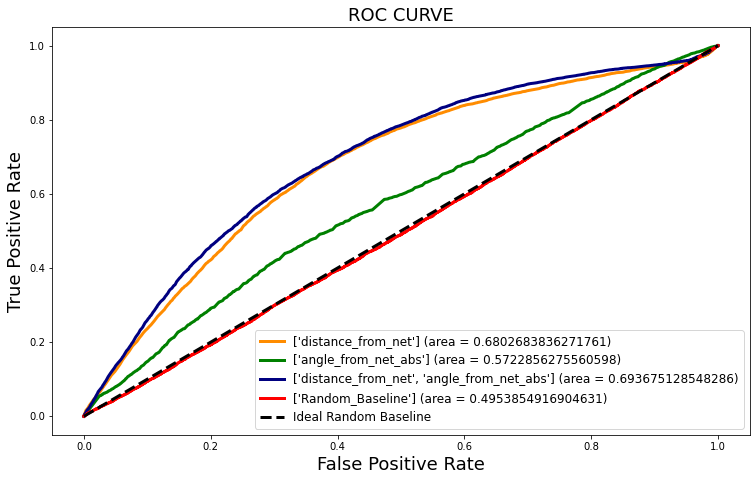

<ipython-input-202-c177be10359d>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-202-c177be10359d>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


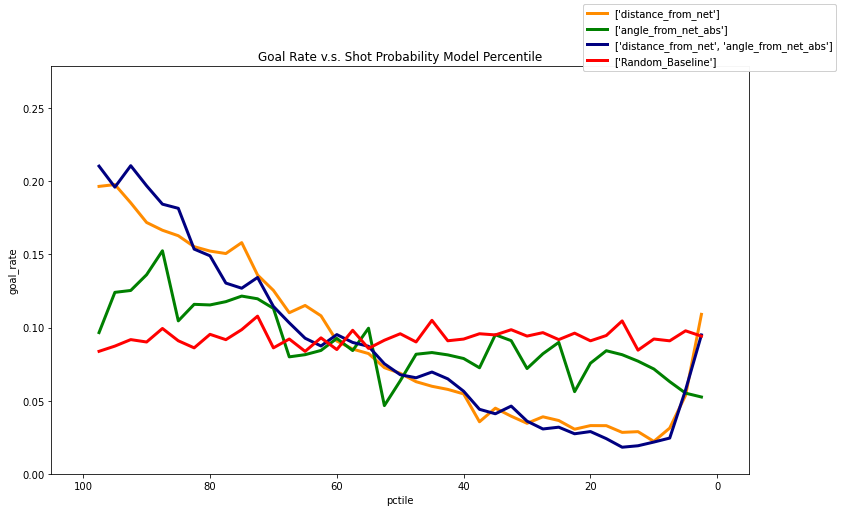

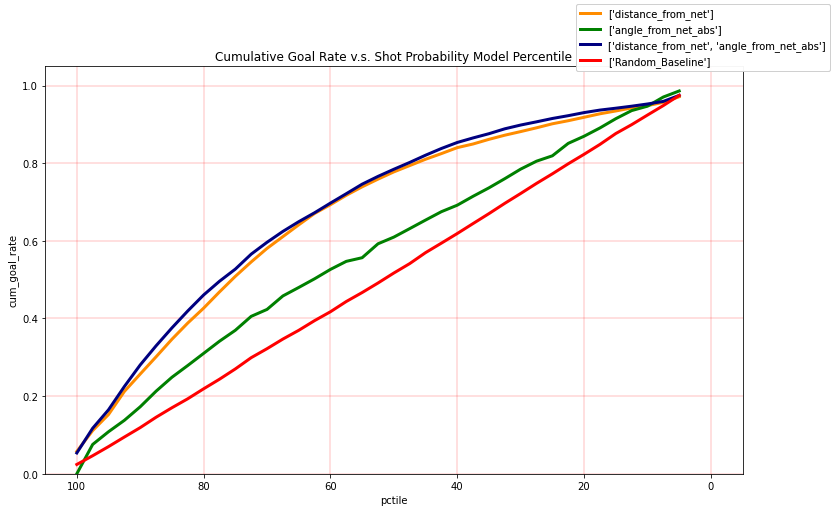

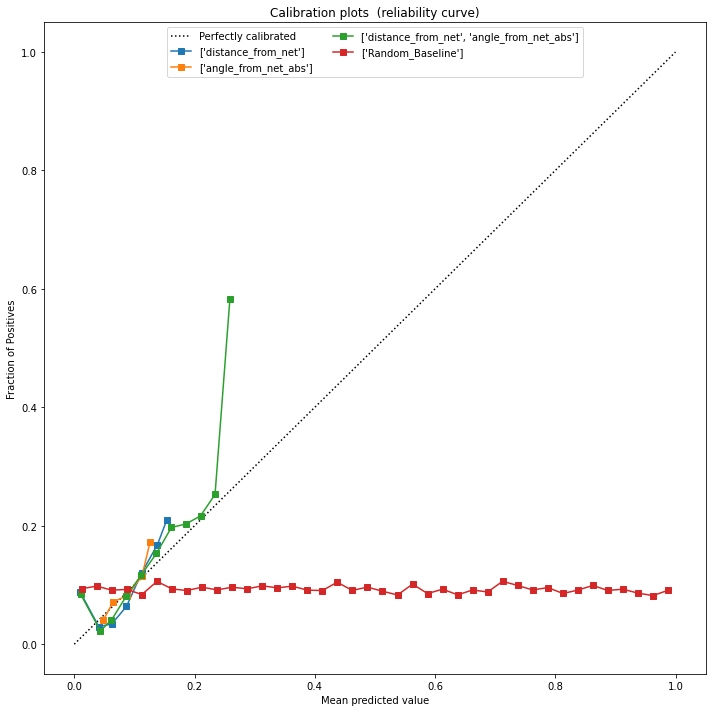

In [211]:
df_train2 = df_train.copy()
df_train2['angle_from_net_abs'] = df_train2['angle_from_net'].abs() #Absolute angle considered for training the model
df_train2['Random_Baseline'] = 0
fpr,tpr,roc_auc = dict(),dict(),dict()
fpr_list,tpr_list,roc_auc_list,feature_list=[],[],[],[]
df_cum_prop1,df_cum_prop2,df_cum_prop3 = [],[],[]

df_perc,goal_count,shot_count,goal_rate,cum_goal_rate,pctile,pctile_prop = [],[],[],[],[],[],[]
goal_count2,pctile2,cum_goal_rate2 = [],[],[]
n_bins, quant = 40,2.5
list_model_iter = [['distance_from_net'],
                   ['angle_from_net_abs'],
                   ['distance_from_net','angle_from_net_abs'],
                   ['Random_Baseline'],
                  ]
y = df_train2['goal_ind']
predicted_prob_goal,temp_y_valid = [],[]

for ele in list_model_iter:
    feature_list.append(ele)
    
    if ele != ['Random_Baseline']:
        if df_train2[ele].shape[1] == 1:
            X = df_train2[ele].values.reshape(-1,1)
            call_log_reg(X,y)
            temp_y_valid += y_valid.tolist()
            for prob in predicted_prob:
                predicted_prob_goal.append(prob[1])
        else:
            X = df_train2[ele].values
            call_log_reg(X,y)
            temp_y_valid  += y_valid.tolist()
            for prob in predicted_prob:
                predicted_prob_goal.append(prob[1])

    else:
        X = df_train2['distance_from_net'].values.reshape(-1,1)
        call_log_reg(X,y)
        temp_y_valid  += y_valid.tolist()
        for ele in range(X_valid.shape[0]):
            predicted_prob_goal.append(np.random.uniform(0, 1)) 
#            temp_y_valid.append(np.random.randint(0, 1)) #<------------check this

#--------------------Determine ROC curve----------------------------------
length = len(temp_y_valid)/4
df_prob = pd.DataFrame(list(zip(temp_y_valid,predicted_prob_goal)), columns = ['goal_ind','Goal_Prob'])
df_prob['shot_count'] = 1

# df_calib is copy of df_prob
df_calib = df_prob.copy()
for m in range(len(list_model_iter)):
    df_prob_f = df_prob.loc[m*length:length*(m+1)-1,:]
    fpr, tpr, _ = roc_curve(df_prob_f['goal_ind'], df_prob_f['Goal_Prob'])
    roc_auc = auc(fpr, tpr)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)
# df_prob_f1 is copy of df_prob_f
    df_prob_f1 = df_prob_f.copy()
    df_prob_f1['percentile'] = df_prob_f1['Goal_Prob'].rank(pct=True)
    quantile_list = np.linspace(0,1,n_bins*5+1).round(4).tolist()
    q = df_prob_f1.quantile(quantile_list)
    col = 'Goal_Prob'
    for i in np.arange(quant,(quant*n_bins)+1,quant):
        df_perc = df_prob_f1[((df_prob_f1[col]>=q[col][(i-quant)/100]) & (df_prob_f1[col]<q[col][i/100]))]
        goal_count.append(df_perc['goal_ind'].sum())
        shot_count.append(df_perc['shot_count'].sum())
        goal_rate.append(df_perc['goal_ind'].sum()/df_perc['shot_count'].sum())
        pctile.append(i)
    df_perc_prop = pd.DataFrame(list(zip(goal_count,shot_count,goal_rate,pctile)),columns=['goal_count',"sum_shot_count",'goal_rate','pctile'])
# df_prob_f2 is copy of df_prob_f

    df_prob_f2 = df_prob_f.copy()
    df_prob_f2['percentile'] = df_prob_f2['Goal_Prob'].rank(pct=True)
    q2 = df_prob_f2.quantile(quantile_list)
    total = df_prob_f2['goal_ind'].sum()

    temp,j=0,100
    
    for j in np.arange((quant*n_bins),0,-quant):
        df_perc2 = df_prob_f2[((df_prob_f2[col]>q[col][(j-quant)/100]) & (df_prob_f2[col]<=q[col][j/100]))]
        goal_count2.append(df_perc2.goal_ind.sum())
        temp+=df_perc2.goal_ind.sum()
        cum_goal_rate2.append(temp/total)
        pctile2.append(j)
       
    df_perc_prop_cum = pd.DataFrame(list(zip(goal_count2,cum_goal_rate2,pctile2)),columns=['goal_count','cum_goal_rate','pctile'])
#print(df_perc_prop_cum[:20])

# Call for functions to plot curves
#----------------------------------------------------------------------------------------------- 
df_roc=pd.DataFrame(list(zip(fpr_list,tpr_list)),columns = ['FPR','TPR'])
df_auc=pd.DataFrame(list(zip(feature_list,roc_auc_list)),columns = ['Feature','AUC'])
roc_auc_plot(df_roc,df_auc)
#--------------------Determine Goal Rate (#goals / (#no_goals + #goals)) ----------------------------------
goal_rate_plot(df_perc_prop,n_bins)

#-----------------------------------------------------------------------------------------------
cum_rate_plot(df_perc_prop_cum,n_bins)
#-----------------------------------------------------------------------------------------------

calibration_plot(df_calib,n_bins,length)

